In [1]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created July 4, 2023 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha and Connor Sanderford"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com and csanderf@asu.edu; connorsanderford@gmail.com"

In [2]:
from trips.testProblems import *
from trips.solvers.CGLS import *
from trips.solvers.arnoldi_tikhonov import *
from trips.solvers.Tikhonov import *
from trips.solvers.GMRES import *
from trips.solvers.golub_kahan_tikhonov import *

#### The test problem when the operator is not built expliictly

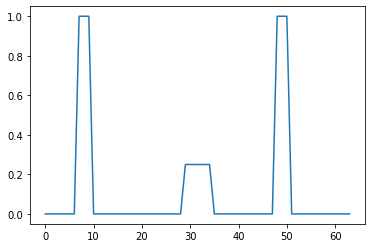

In [3]:
D1D = Deblurring1D()
N = 64
x_true = D1D.gen_xtrue(N, test = 'piecewise')
## If you would like to create the operator only
A = D1D.forward_Op_1D(x_true, blur_type = 'Gaussian', parameter = 0.4) 
## The following creates the data b_true
b_true = D1D.gen_data(x_true, blur_type = 'Gaussian', parameter = 0.4)
(b, delta) = D1D.add_noise(b_true, 'Gaussian', 0.0)
plt.plot(x_true)

### Test a methods

##### 1. CGLS

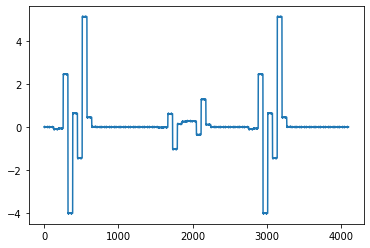

In [4]:
(xcgls, info) = TP_cgls(A, b_true, A.T@b, 20, 1e-3, x_true.reshape((-1,1)))
plt.plot(xcgls.reshape((-1,1)))
rel_residual = info['relResidual']
rel_error = info['relError']

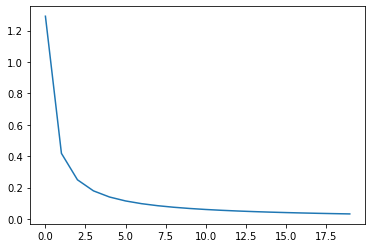

In [5]:

plt.plot(rel_residual)

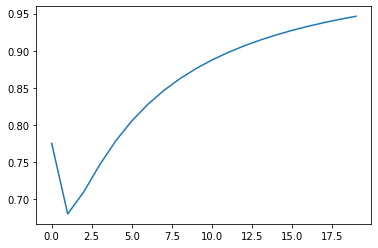

In [6]:
plt.plot(rel_error)

#### The test problem when the operator is not built expliictly

generating basis...: 100%|██████████| 9/9 [00:00<00:00, 1027.26it/s]

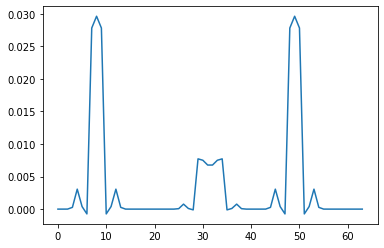

In [7]:
b_vec = b.reshape((-1,1))
(xarnoldi_tikhonov, reg_param) = arnoldi_tikhonov(A, b_vec, n_iter = 9, regparam = 'gcv', delta = delta, shape = [64, 64])
plt.plot(xarnoldi_tikhonov)

#### The test problem when the operator is built expliictly

In [8]:
# The operator A is built as a matrix
## Note: The parameters defining the operators are different, hence different reconstructions
Amat = D1D.forward_Op_matrix_1D(3, N)

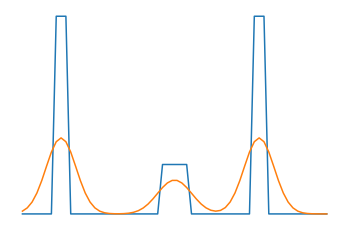

<Figure size 432x288 with 0 Axes>

In [9]:
b_true = Amat@x_true
plt.plot(x_true)
D1D.plot_data(b_true)

### Test methods

##### 1. CGLS

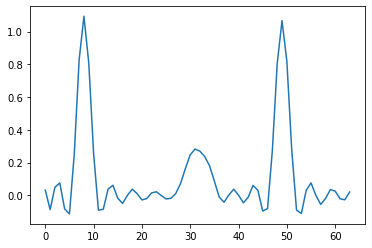

In [10]:
(xcgls, info) = TP_cgls(Amat, b_true, np.zeros((N,1)), 200, 1e-8, x_true)
plt.plot(xcgls.reshape(-1,1))

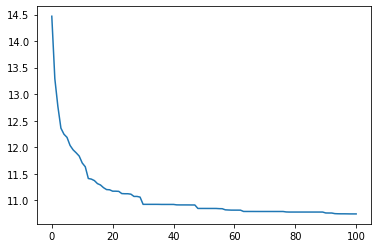

In [11]:
rel_err = info['relError']
plt.plot(rel_err)

#### 2. Arnoldi Tikhonov

In [12]:
reg_param

99.99999749408131

In [13]:
b_vec = b.reshape((-1,1))
(xarnoldi_tikhonov, reg_param) = arnoldi_tikhonov(Amat, b_vec, n_iter = 3, regparam = 'dp', delta = delta)
plt.plot(xarnoldi_tikhonov)

generating basis...: 100%|██████████| 3/3 [00:00<00:00, 2485.76it/s]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 1

### 3. Golub-Kahan Tikhonov

generating basis...: 100%|██████████| 3/3 [00:00<00:00, 3006.67it/s]


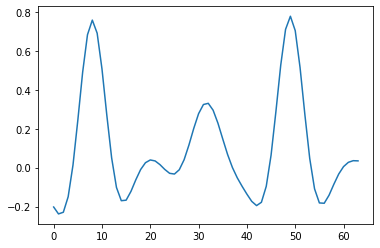

In [14]:
b_vec = b.reshape((-1,1))
(xgolub_kahan_tikhonov, reg_param) = golub_kahan_tikhonov(Amat, b_vec, n_iter = 10, regparam = 'gcv', delta = delta)
plt.plot(xgolub_kahan_tikhonov)

#### 4. GMRES


In [15]:
xgmres = GMRES(A, b, n_iter = 2, dp_stop = 0)

generating basis...: 100%|██████████| 5/5 [00:00<00:00, 1671.84it/s]
/Users/mirjetapasha/opt/anaconda3/lib/python3.8/site-packages/trips/solvers/GMRES.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  y = np.linalg.lstsq(H.T, H.T@bhat)[0]


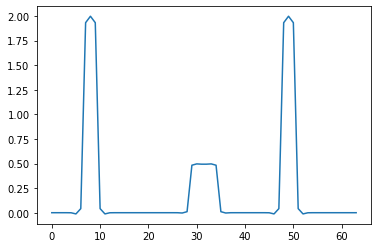

In [16]:
plt.plot(xgmres)

In [17]:
## Define the regularization operator as a matrix here

In [18]:
from trips.operators import *

In [19]:
def generate_first_derivative_operator_matrix(n):

    D = sparse.spdiags( data=np.ones(n-1) , diags=-1, m=n, n=n)
    L = sparse.identity(n)-D
    L = L[0:-1, :]

    return L

In [20]:
L = generate_first_derivative_operator_matrix(4)
L.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.],
        [ 0., -1.,  1.,  0.]])

In [47]:
LL = generate_first_derivative_operator_2d_matrix(3,3)